## 필수 과제1

- 타이타닉데이터로 생존 관련 분석을 하고 모비율, 모평균 분석
- 추정을 하고 신뢰구간 연산 후 출력해주세요
- 위에서 1차 분석이 들어가야한다 . i.e 생존율이 높은 표본들의 나이거나 이런식의 1,2차원의 뎁스로 분석이 들어간 후에 구간을 추정하는 것으로 진행
- 아이디어는 자유롭게하면되지만 분석 근거를 주석이나 코드로 정리해야함

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
tt = sns.load_dataset('titanic')
titanic = tt.dropna(subset = 'age')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# 생존자 표본 추출
sample_size = 100
np.random.seed(1)
sp = titanic['survived'].sample(n=sample_size, random_state = 1)

In [7]:
# 추정량 계산과 평균, 표준오차
sample_mean = sp.mean()
# 100명 랜덤 :생존률 평균 0.37%
sample_mean

0.37

In [12]:
sample_std = sp.std(ddof = 1)
# 표본의 표준편차: 0.48~
print("표본의 표준편차:", sample_std)
# 표준오차 구하기
std_error = sample_std / np.sqrt(sample_size)
print("표준오차:", std_error)

표본의 표준편차: 0.48523658709390977
표준오차: 0.048523658709390974


In [13]:
# 신뢰구간 90%
cof_level = 0.90
degrees_freedom = sample_size -1

# 신뢰구간 stats 쉽게 구할 수 있다
cof_interval = stats.t.interval(cof_level, degrees_freedom, sample_mean, std_error) # 신뢰구간 level, 자유도, 샘플 평균 샘플 표준오차
cof_interval # 0.289~0.45까지의 생존률이 믿음직스럽다

(0.28943174622234, 0.45056825377765997)

In [14]:
# 결과 출력해보기
print(f'표본 크기: {sample_size}')
print(f'표본 평균: { sample_mean: .2f}')
print(f'표본 표준편차: {sample_std: .2f}')
print(f'표준오차: {std_error: .2f}')
print(f'신뢰구간: {cof_interval}')

표본 크기: 100
표본 평균:  0.37
표본 표준편차:  0.49
표준오차:  0.05
신뢰구간: (0.28943174622234, 0.45056825377765997)


In [17]:
# 전체 titanic 데이터 비교: 모집단 평균 41%의 생존률 _ 신뢰구간에 포함
tt_mean = titanic['survived'].mean()
print(f'모집단 평균: {tt_mean:.2f}')

모집단 평균: 0.41


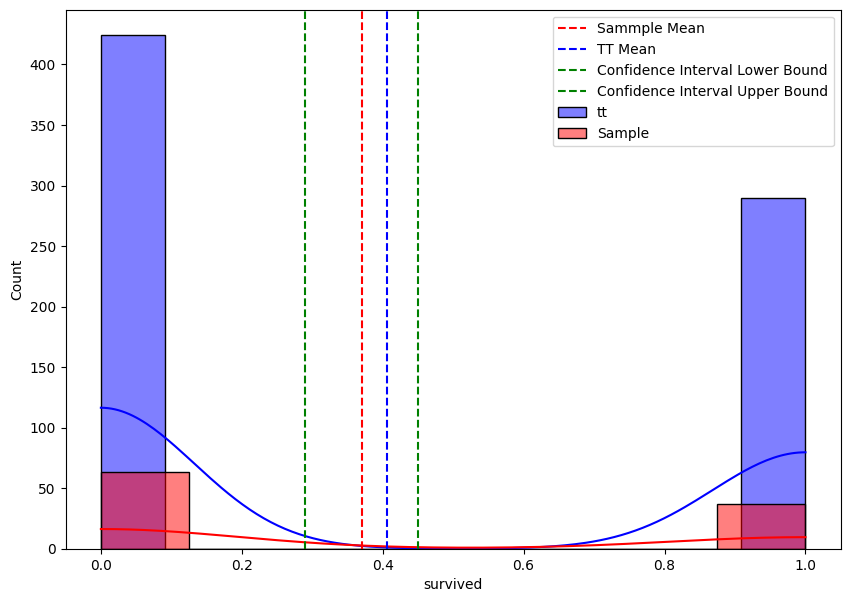

In [19]:
# 시각화를 통해 그래프 그려보기 : 모집단의 분포를 알아보기
# 모집단과 표본집단의 평균이 어느정도 일치하는지 확인하는 방법
plt.figure(figsize = (10,7))
sns.histplot(titanic['survived'], kde = True, color ='blue', label = 'tt')
sns.histplot(sp, kde = True, color = 'red', label = 'Sample', alpha = 0.5)
plt.axvline(sample_mean, color = 'red', linestyle = '--', label = 'Sammple Mean')
plt.axvline(tt_mean, color = 'blue', linestyle = '--', label = 'TT Mean')
plt.axvline(cof_interval[0], color = 'green', linestyle = '--', label = 'Confidence Interval Lower Bound')
plt.axvline(cof_interval[1], color = 'green', linestyle = '--', label = 'Confidence Interval Upper Bound')
plt.legend()
plt.show()

## 자료 해석
- 파란색: 모집단
- 빨간색: 표본 100개 중 60개 정도는 왼쪽, 40정도가 생존에 있는 상황
- 초록색 :신뢰구간 0.28~0.45
- 빨간선: 생존률의 평균
- 파란선: 실제 생존률의 평균

# 전체코드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

tt = sns.load_dataset('titanic')
titanic = tt.dropna(subset = 'age')


# 생존자 표본 추출
sample_size = 100
np.random.seed(1)
sp = titanic['survived'].sample(n=sample_size, random_state = 1)


# 추정량 계산과 평균, 표준오차
sample_mean = sp.mean()
# 100명 랜덤 :생존률 평균 0.37%
sample_mean

sample_std = sp.std(ddof = 1)
# 표본의 표준편차: 0.48~
print("표본의 표준편차:", sample_std)
# 표준오차 구하기
std_error = sample_std / np.sqrt(sample_size)
print("표준오차:", std_error)

# 신뢰구간 90%
cof_level = 0.90
degrees_freedom = sample_size -1

# 신뢰구간 stats 쉽게 구할 수 있다
cof_interval = stats.t.interval(cof_level, degrees_freedom, sample_mean, std_error) # 신뢰구간 level, 자유도, 샘플 평균 샘플 표준오차
cof_interval # 0.289~0.45까지의 생존률이 믿음직스럽다


# 결과 출력해보기
print(f'표본 크기: {sample_size}')
print(f'표본 평균: { sample_mean: .2f}')
print(f'표본 표준편차: {sample_std: .2f}')
print(f'표준오차: {std_error: .2f}')
print(f'신뢰구간: {cof_interval}')


# 전체 titanic 데이터 비교: 모집단 평균 41%의 생존률 _ 신뢰구간에 포함
tt_mean = titanic['survived'].mean()
print(f'모집단 평균: {tt_mean:.2f}')

# 시각화를 통해 그래프 그려보기 : 모집단의 분포를 알아보기
# 모집단과 표본집단의 평균이 어느정도 일치하는지 확인하는 방법
plt.figure(figsize = (10,7))
sns.histplot(titanic['survived'], kde = True, color ='blue', label = 'tt')
sns.histplot(sp, kde = True, color = 'red', label = 'Sample', alpha = 0.5)
plt.axvline(sample_mean, color = 'red', linestyle = '--', label = 'Sammple Mean')
plt.axvline(tt_mean, color = 'blue', linestyle = '--', label = 'TT Mean')
plt.axvline(cof_interval[0], color = 'green', linestyle = '--', label = 'Confidence Interval Lower Bound')
plt.axvline(cof_interval[1], color = 'green', linestyle = '--', label = 'Confidence Interval Upper Bound')
plt.legend()
plt.show()

# 2차원 분석: 생존한 사람들의 요금 평균 구해보기

In [20]:
# 생존자의 요금 데이터 추출
fare_survived = titanic[titanic['survived'] == 1]['fare']



# 생존자 표본 추출
sample_size = 200
np.random.seed(1)
fare_sample = fare_survived.sample(n=sample_size, random_state=1)

In [21]:
# 추정량 계산과 평균, 표준오차
sample_mean = fare_sample.mean()
print("표본 평균 (요금):", sample_mean)

sample_std = fare_sample.std(ddof=1)
print("표본의 표준편차 (요금):", sample_std)

# 표준오차 구하기
std_error = sample_std / np.sqrt(sample_size)
print("표준오차 (요금):", std_error)

표본 평균 (요금): 51.459439
표본의 표준편차 (요금): 68.36562183122692
표준오차 (요금): 4.8341794796895625


In [22]:
# 신뢰구간 90%
confidence_level = 0.90
degrees_freedom = sample_size - 1

# 신뢰구간 계산
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, std_error)
print("신뢰구간 (요금):", confidence_interval)

신뢰구간 (요금): (43.47073143045686, 59.44814656954314)


In [23]:
# 결과 출력
print(f'표본 크기: {sample_size}')
print(f'표본 평균 (요금): {sample_mean:.2f}')
print(f'표본 표준편차 (요금): {sample_std:.2f}')
print(f'표준오차 (요금): {std_error:.2f}')
print(f'신뢰구간 (요금): {confidence_interval}')

표본 크기: 200
표본 평균 (요금): 51.46
표본 표준편차 (요금): 68.37
표준오차 (요금): 4.83
신뢰구간 (요금): (43.47073143045686, 59.44814656954314)


In [24]:
# 전체 생존자 요금 데이터의 평균
tt_fare_mean = fare_survived.mean()
print(f'모집단 평균 (요금): {tt_fare_mean:.2f}')


모집단 평균 (요금): 51.84


## 결과 해석
- sample 크기는 200개. 모집단과 비슷한 분포로 뽑힘
- sample mean과 모집단의 평균이 비슷해 빨간선이 보이지 않음
  - 표본의 요금 평균은 51.46, 모집단의 평균은 51.84다
- 초록색: 신뢰구간 90%(43달러~59달러)

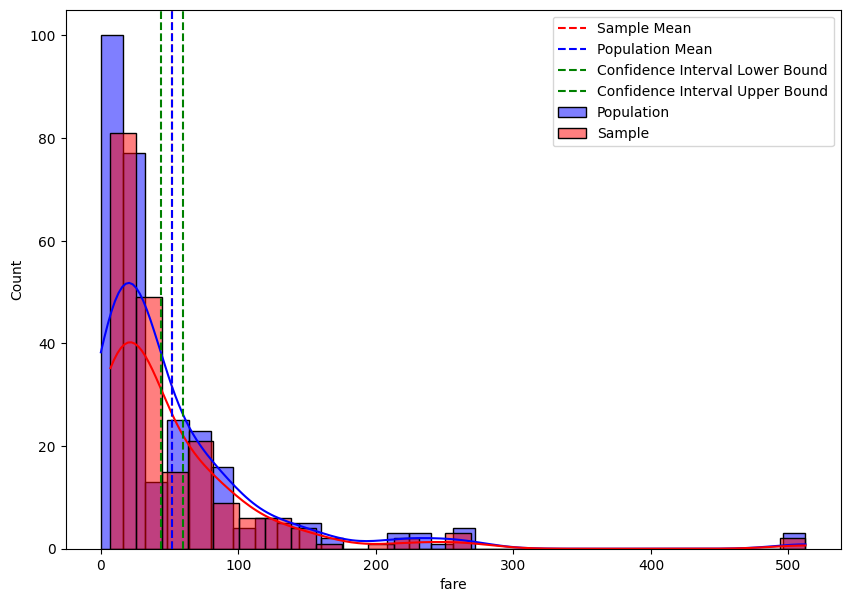

In [25]:
# 시각화를 통해 그래프 그려보기: 모집단의 분포를 알아보기
plt.figure(figsize=(10, 7))
sns.histplot(fare_survived, kde=True, color='blue', label='Population')
sns.histplot(fare_sample, kde=True, color='red', label='Sample', alpha=0.5)
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(tt_fare_mean, color='blue', linestyle='--', label='Population Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Confidence Interval Upper Bound')
plt.legend()
plt.show()